# NBA statistika

Projekt pri predmetu Programiranje 1.

Za projekt iz analize podatkov, pri predmetu Programiranje 1 sem izbral analizo košarkaške lige NBA.
Za vsakega igralca, ki je igral v ligi v sezoni 2015/2016 imamo nekaj osnovnih podatkov o njegovi uspešnosti:

- Število odigranih tekem
- Število točk
- Število skokov
- Število asistenc
- Število blokad
- Število izgubljenih žog
- Število odigranih minut v celoti

Iz teh podatkov, bom izračunal nekaj naprednejših statističnih podatkov, kot so:

- Vse zgoraj omenjeni podatki, glede na tekmo, glede na odigranih 36 minut, glede na celotno sezono, glede na določen del sezone
- Koeficienti uspešnosti glede na različne kombinacije kategorij
- ...

Zavedam se, da je večina podatkov že izračunanih, saj je to najmočnejša košarkaška liga ter zato 
zelo dobro pokrita tudi s strani statistike. Vendar pa verjamem, da lahko vseeno izračunam tudi kakšen bolj zapleten
oziroma na prvi pogled manj pomemben podatek, ki pa je lahko odločilnega pomena pri izbiri novih igralcev.


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

In [2]:
Podatki_path = r"C:\Users\Injets\Desktop\FAKS\2_LETNIK\Programiranje\PROJEKT\NBAtocke.csv"
Podatki = pd.read_csv(Podatki_path, encoding='latin1')
Ohrani = ['Igralec','Pozicija','Starost','Ekipa','Stevilo tekem','Stevilo zacetih','Minute na tekmo',
          '3 Tocke','3 Tocke poiskusi','2 Tocki','2 Tocki poiskusi','Prosti meti','Skoki v napadu',
          'Skoki v obrambi','Ukradene zoge','Blokade','Asistence','Izgubljene zoge','Osebne napake','Tocke na tekmo']
NoviPodatki = Podatki[Ohrani]
NoviPodatki.to_csv("newFile.csv", index=False)
NoviPodatki

,Igralec,Pozicija,Starost,Ekipa,Stevilo tekem,...,Blokade,Asistence,Izgubljene zoge,Osebne napake,Tocke na tekmo
0,Stephen Curry,PG,27,GSW,79,...,0.2,6.7,3.3,2.0,30.1
1,James Harden,SG,26,HOU,82,...,0.6,7.5,4.6,2.8,29.0
2,Kevin Durant,SF,27,OKC,72,...,1.2,5.0,3.5,1.9,28.2
3,DeMarcus Cousins,C,25,SAC,65,...,1.4,3.3,3.8,3.6,26.9
4,LeBron James,SF,31,CLE,76,...,0.6,6.8,3.3,1.9,25.3
5,Damian Lillard,PG,25,POR,75,...,0.4,6.8,3.2,2.2,25.1
6,Anthony Davis,PF,22,NOP,61,...,2.0,1.9,2.0,2.4,24.3
7,DeMar DeRozan,SG,26,TOR,78,...,0.3,4.0,2.2,2.1,23.5
8,Russell Westbrook,PG,27,OKC,80,...,0.3,10.4,4.3,2.5,23.5
9,Paul George,SF,25,IND,81,...,0.4,4.1,3.3,2.8,23.1


Izpišimo sedaj očitno najpomembnejšo kategorijo: Koliko točk posamezen igralec dosega na tekmo. (Izpišimo prvih 10.)

In [3]:
NajvecTockNaTekmo = NoviPodatki.groupby('Igralec')
NajvecTockNaTekmo['Tocke na tekmo'].sum().sort_values(ascending=False)[:10]

Igralec
Stephen Curry        30.1
James Harden         29.0
Kevin Durant         28.2
DeMarcus Cousins     26.9
LeBron James         25.3
Damian Lillard       25.1
Anthony Davis        24.3
Russell Westbrook    23.5
DeMar DeRozan        23.5
Paul George          23.1
Name: Tocke na tekmo, dtype: float64

Izračunajmo, kakšen izgleda povprečen košarkaš v ligi NBA.

In [129]:
NoviPodatki.mean()

Starost             26.594538
Stevilo tekem       54.785714
Stevilo zacetih     25.840336
3 Tocke              0.688025
3 Tocke poiskusi     1.963866
2 Tocki              2.426471
2 Tocki poiskusi     4.988866
Prosti meti          1.434874
Skoki v napadu       0.870378
Skoki v obrambi      2.754832
Ukradene zoge        0.653361
Blokade              0.415126
Asistence            1.826050
Izgubljene zoge      1.146849
Tocke na tekmo       8.349370
dtype: float64

Povprečen igralec, je torej star 26 let in pol, dosega nekaj čez 3 skoke na tekmo, skoraj 2 asistenci ter malo čez 8 točk na tekmo.

Poglejmo, koliko igralcev igra na določeni poziciji (C-center, PF-krilni center, F-krilo, G-organizator igre, SG-shooting guard)

In [273]:
NoviPodatki['Pozicija'].value_counts()

PF       102
SG        96
PG        95
SF        92
C         89
PF-C       1
SG-SF      1
Name: Pozicija, dtype: int64

Poglejmo sedaj, kakšen je delež igralcev v ligi po starosti v letih.

<IPython.core.display.Javascript object>


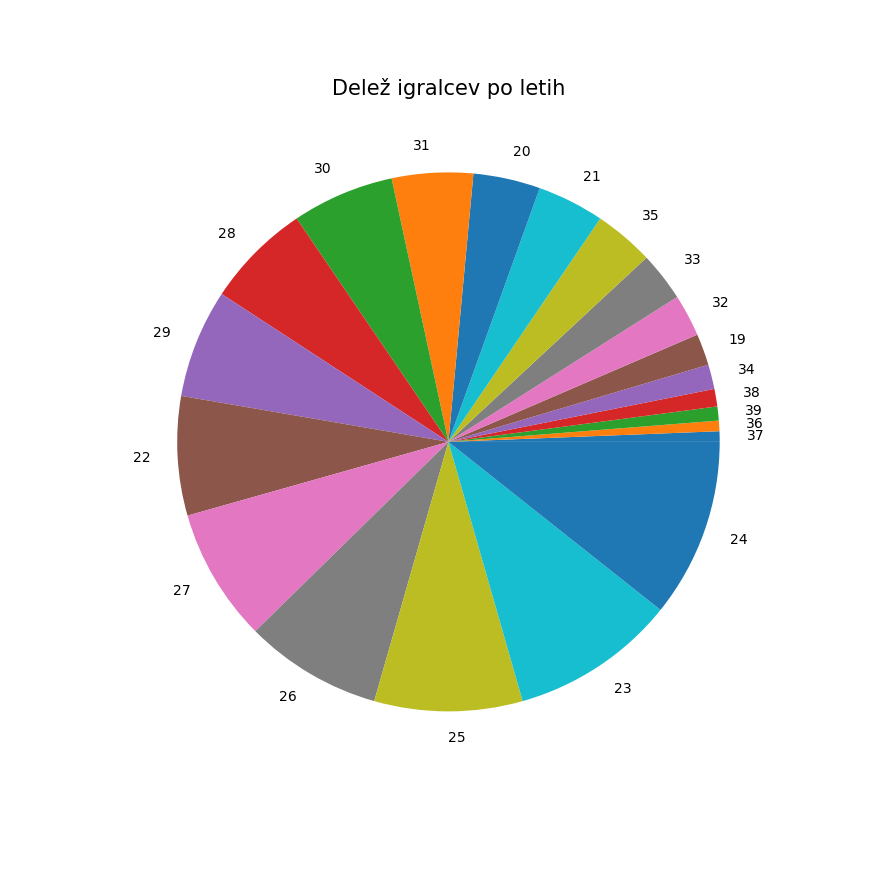

In [274]:
Starost = NoviPodatki.groupby('Starost')
Starost.size().sort_values().plot(kind='pie',figsize=(7, 7), fontsize=8, title='Delež igralcev po letih')
plt.ylabel('')

Poglejmo sedaj primerjavo med starostjo in doseženim številom točk na tekmo.

<IPython.core.display.Javascript object>


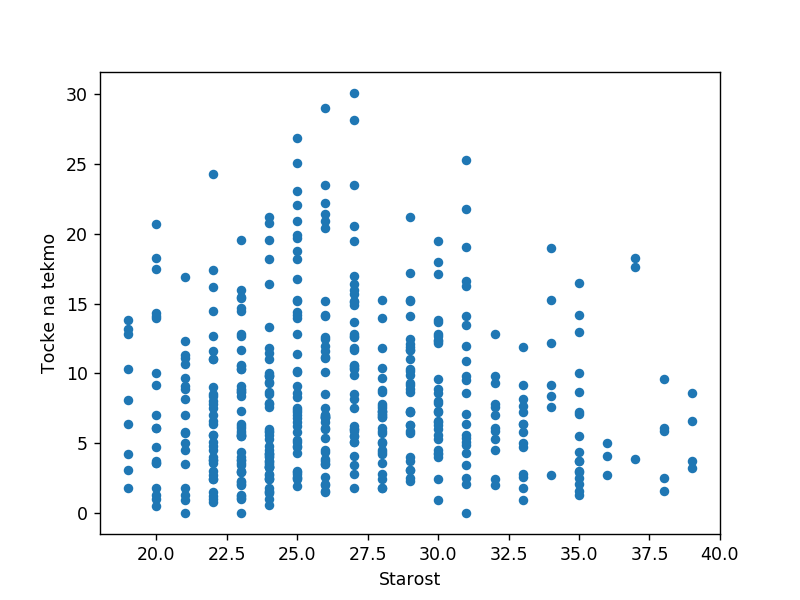

In [4]:
Starost1 = NoviPodatki['Starost']
Tocke1 = NoviPodatki['Tocke na tekmo']
NoviPodatki.plot(x='Starost', y='Tocke na tekmo', kind='scatter', use_index = False)

Pričakovano so igralci, ki dosegajo največ točk na tekmo stari okoli 27 let. 
Mlajši igalci v povprečju dosegajo manj točk, saj niso še tako izkušeni, enako starejši igralci,
ki po telesnih zmogljivosti ne morejo več parirati mlajšim igralcem.

Poizkusimo najti 'najbolšega igralca' v ligi. V ta namen bom sestavil funkcijo, ki bo vzela parametre iz nekaj 
kategorij ter nam vrnila igralca, ki se najbol približa tem vrednostim.
Za začetek bomo naši tabeli pridružili 3 stolpce: Procent meta za 3 točke, procent meta za 2 točki, procent vseh metov.
Formule so očitne: stevilo zadetih metov, deljeni s stevilom poiskusov krat 100.

In [5]:
NoviPodatki = NoviPodatki.assign(Procent3=NoviPodatki['3 Tocke'] / NoviPodatki['3 Tocke poiskusi']*100)
NoviPodatki = NoviPodatki.assign(Procent2=NoviPodatki['2 Tocki'] / NoviPodatki['2 Tocki poiskusi']*100)

Najprej izračunajmo index PIR (Performance index rating). Formula za ta index je preprosta, saj samo seštejemo vse 
pozitivne kategorije (Točke, asistence, blokade, skoke) in odštejemo negativne kategorije (favle, izgubljene žoge, zgrešene mete).

In [6]:
a = NoviPodatki['Tocke na tekmo'] 
b = NoviPodatki['Asistence'] 
c = NoviPodatki['Blokade'] 
d = NoviPodatki['Skoki v obrambi'] 
e = NoviPodatki['Skoki v napadu'] 

f = NoviPodatki['Osebne napake'] 
g = NoviPodatki['Izgubljene zoge'] 
h = NoviPodatki['2 Tocki poiskusi'] - NoviPodatki['2 Tocki'] 
i = NoviPodatki['3 Tocke poiskusi'] - NoviPodatki['3 Tocke'] 

NajboljsiPIR = (a + b + c + d + e) - (f + g + h + i)

In [7]:
NoviPodatkiPIR = NoviPodatki.assign(PIR = NajboljsiPIR)
NoviPodatkiPIR[['Igralec', 'PIR']].sort_values(ascending = False, by='PIR')[:15]

,Igralec,PIR
2,Kevin Durant,27.7
0,Stephen Curry,27.2
4,LeBron James,26.1
8,Russell Westbrook,25.3
1,James Harden,24.8
6,Anthony Davis,24.5
3,DeMarcus Cousins,24.5
95,DeAndre Jordan,23.9
49,Andre Drummond,22.0
45,Pau Gasol,21.9


In [230]:
Opazimo zanimivo posledico: najbolši po indexu PIR so najboljsi tudi po stevilu tock na tekmo, 
vendar se nato okoli 10 mesta pojavi kar nekaj igralcev, ki so v razvrstitvi po točkah nižje. 
(Številka na levi namreč pomeni, kateri je igralec v razvrstitvi po točkah.)
Poglejmo malo natančneje: izpišimo še pozicijo na kateri igrajo igralci in točke ki jih dosegajo.

SyntaxError: invalid syntax (<ipython-input-230-5d940abd549c>, line 1)

In [8]:
NoviPodatkiPIR[['Igralec', 'Pozicija', 'PIR', 'Tocke na tekmo']].sort_values(ascending = False, by='PIR')[:15]

,Igralec,Pozicija,PIR,Tocke na tekmo
2,Kevin Durant,SF,27.7,28.2
0,Stephen Curry,PG,27.2,30.1
4,LeBron James,SF,26.1,25.3
8,Russell Westbrook,PG,25.3,23.5
1,James Harden,SG,24.8,29.0
6,Anthony Davis,PF,24.5,24.3
3,DeMarcus Cousins,C,24.5,26.9
95,DeAndre Jordan,C,23.9,12.7
49,Andre Drummond,C,22.0,16.2
45,Pau Gasol,C,21.9,16.5


Kot lahko vidimo vsi tej igralci igrajo na poziciji centra, torej na tekmo zberejo veliko več skokov od ostalih manjših igralcev, prav tako pa mečejo iz manjše razdalje, kar pomeni boljši procent meta. Prav tako pa izgubijo manj žog,
saj večinoma igrajo le v zaključku akcije in je njihova primarna naloga le zadeti koš in dobiti skok v napadu ali obrambi.

Poglejmo sedaj še en index po kateri liga ocenjuje uspešnost. To je PER(Player efficency rating). Izračunali bomo poenostavljeno formulo, saj je prava zelo zapletena in upošteva čez 10 parametrov. V ta namen bomo index PIR delili s številom odigranih minut na tekmo ter množili z deležem tekem, ki jih je posamezen igralec odigral v sezoni.

In [9]:
a1 =  NoviPodatki['Minute na tekmo'] 
b1 =  NoviPodatki['Stevilo zacetih'] 
c1 =  NoviPodatki['Stevilo tekem'] 
d1 =  NoviPodatkiPIR['PIR'] 

NajboljsiPER = (d1 / a1) * (d1 / c1)

NoviPodatkiPER = NoviPodatkiPIR.assign(PER = NajboljsiPER)
NoviPodatkiPER[['Igralec', 'PER', 'Stevilo tekem', 'Minute na tekmo']].sort_values(ascending = False, by='PER')[:15]

,Igralec,PER,Stevilo tekem,Minute na tekmo
357,Rakeem Christmas,2.666667,1,6.0
87,Dahntay Jones,1.523810,1,42.0
97,Michael Kidd-Gilchrist,1.011019,7,29.3
395,Thanasis Antetokounmpo,0.666667,2,3.0
224,Jodie Meeks,0.472028,3,14.3
13,Blake Griffin,0.395423,35,33.4
89,Michael Beasley,0.332418,20,18.2
249,Brandan Wright,0.324341,12,17.7
445,Kevon Looney,0.321905,5,4.2
122,Jordan Hamilton,0.316337,11,27.6


Vidimo, da se v tej kategoriji že vidijo nekatere napake. Najboljsi igralci so se vedno pri vrhu, seveda pa 
prva dva v tej razvrstitvi nista regularna, saj sta odigrala le eno tekmo. Indeks PER tudi po definiciji favorizira igralce, ki igrajo napadalnejšo igro oz. dosegajo veliko točk v kratkem času. Zanimivo pa je, da lahko tudi iz podatkov za ta indeks lahko najdemo kakšnega igralca, ki ni favoriziran s strani medijev in je vseeno zelo dober ter bi se ga mogoče izplačalo dobiti v svojo eipo. Tak primer je recimo št. 89 Michael Beasley.

Poglejmo še kot zanimivost index PIR in PER v odvisnosti od starosti. (Index PIR bom delil z 10,
saj bom tako, lahko zaradi primerljive velikosti oba indeksa lahko narisal v en graf.)

In [10]:
NoviPodatkiStarost = NoviPodatkiPER[['Igralec', 'PER', 'PIR', 'Starost']].sort_values(ascending = False, by='PER')
NoviPodatkiStarost[:15]

,Igralec,PER,PIR,Starost
357,Rakeem Christmas,2.666667,4.0,24
87,Dahntay Jones,1.523810,8.0,35
97,Michael Kidd-Gilchrist,1.011019,14.4,22
395,Thanasis Antetokounmpo,0.666667,2.0,23
224,Jodie Meeks,0.472028,4.5,28
13,Blake Griffin,0.395423,21.5,26
89,Michael Beasley,0.332418,11.0,27
249,Brandan Wright,0.324341,8.3,28
445,Kevon Looney,0.321905,2.6,19
122,Jordan Hamilton,0.316337,9.8,25


<IPython.core.display.Javascript object>


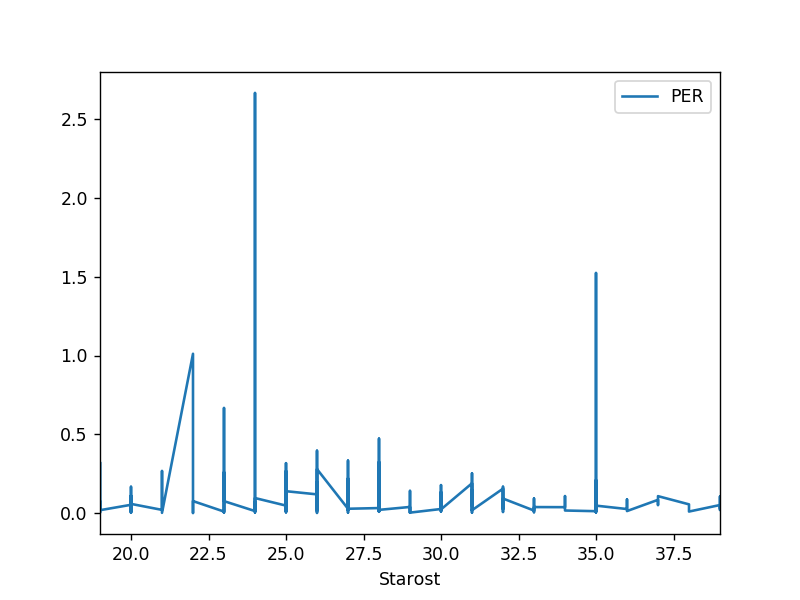

<IPython.core.display.Javascript object>


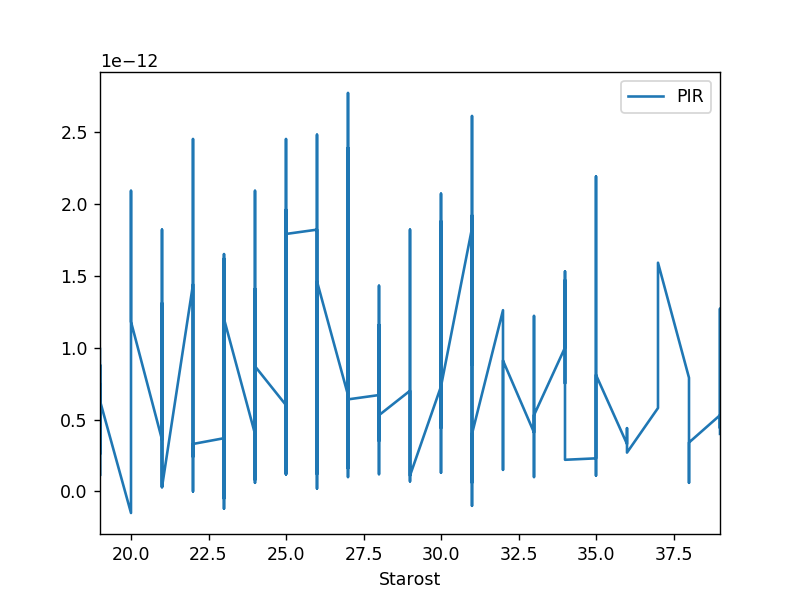

In [43]:
NoviPodatkiStarost1['PIR'] = NoviPodatkiStarost1['PIR']/10
NoviPodatkiStarost1 = NoviPodatkiStarost1[['Igralec', 'PER', 'PIR','Starost']].sort_values(ascending = True, by='Starost')

NoviPodatkiStarost1.plot(x='Starost', y='PER')
NoviPodatkiStarost1.plot(x='Starost', y='PIR')

Vidimo lahko, da indeks PER favorizira mlajše igralce, torej igralce pod 25 let, vidimo pa tudi, da je en vrh tudi pri igralcih starosti 35 let, kar je verjetno napaka v formuli, ki sem jo uporabil.
Indeks PIR je po drugi strani bolj razporejen med igralce različnih starosi, tako da ne favorizira preveč nekaterih igralcev glede na starost.